# 1. (Based on Rice 10.26) Hampson and Walker also made measurements of the heats of subli- mation of rhodium and iridium. Do the following calculations for each of the two given sets of data:

(a) Plot a histogram of the data.

(b) Plot the eCDFs with 95% confidence bands (you may use the ecdf.ksC() function in the R sfsmisc library)

(c) Plot the kernel density estimate.

(d) Plot the observations in the order of the experiment.

(e) Does that statistical model of iid measurement errors seem reasonable? Explain.

(f) Find the mean, 10% and 20% trimmed means, and median and compare them.

(g) Find the standard error of the sample mean and a corresponding 90% confidence interval. Overlay this CI on a density plot.

(h) Use the bootstrap to approximate the sampling distribution of the 10% and 20% trimmed means and median. Plot the kernel density estimates of these bootstrap distributions in a single plot. Compute the standard errors and compare.

(i) Find approximate 90% CIs based on the trimmed means and median and compare to the intervals for the mean.

In [1]:
iridium.data = c(136.6, 145.2, 151.5, 162.7, 159.1, 159.8, 160.8, 173.9, 160.1, 160.4, 161.1, 160.6, 160.2, 159.5, 160.3, 159.2, 159.3, 159.6,160.0, 160.2, 160.1, 160.0, 159.7, 159.5, 159.5, 159.6, 159.5)


rhodium.data = c(126.4, 135.7, 132.9, 131.5, 131.1, 131.1, 131.9, 132.7, 133.3, 132.5, 133.0, 133.0, 132.4, 131.6, 132.6, 132.2, 131.3, 131.2, 132.1, 131.1, 131.4, 131.2, 131.1, 131.1, 134.2, 133.8, 133.3, 133.5, 133.4, 133.5, 133.0, 132.8, 132.6, 133.3, 133.5, 133.5, 132.3, 132.7, 132.9, 134.1)


a) Plot a histogram of the data.

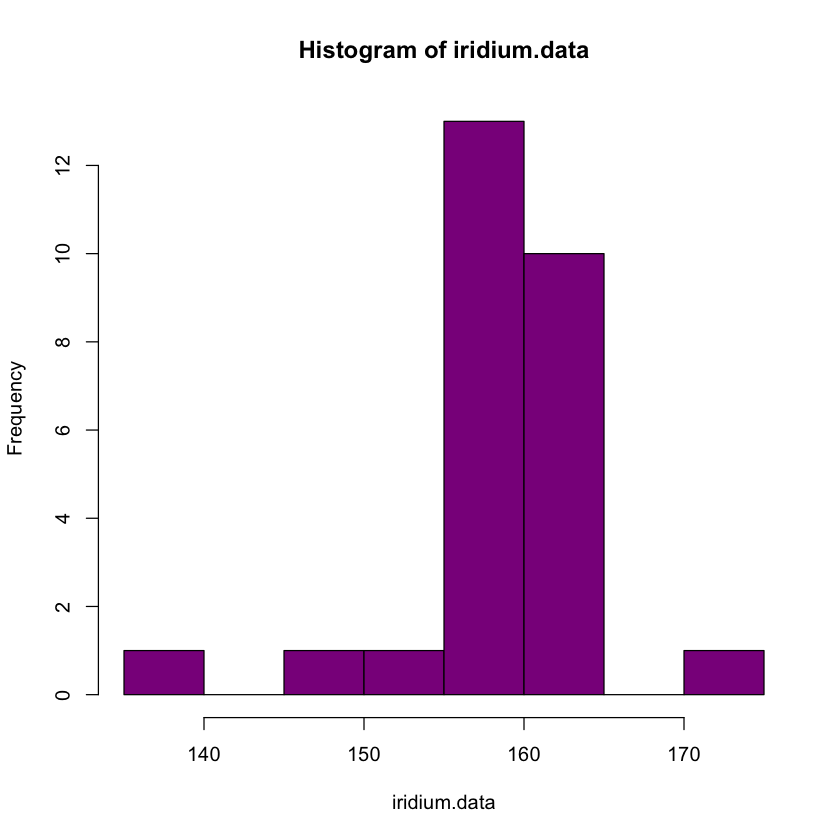

In [2]:
hist(iridium.data,col="darkmagenta")

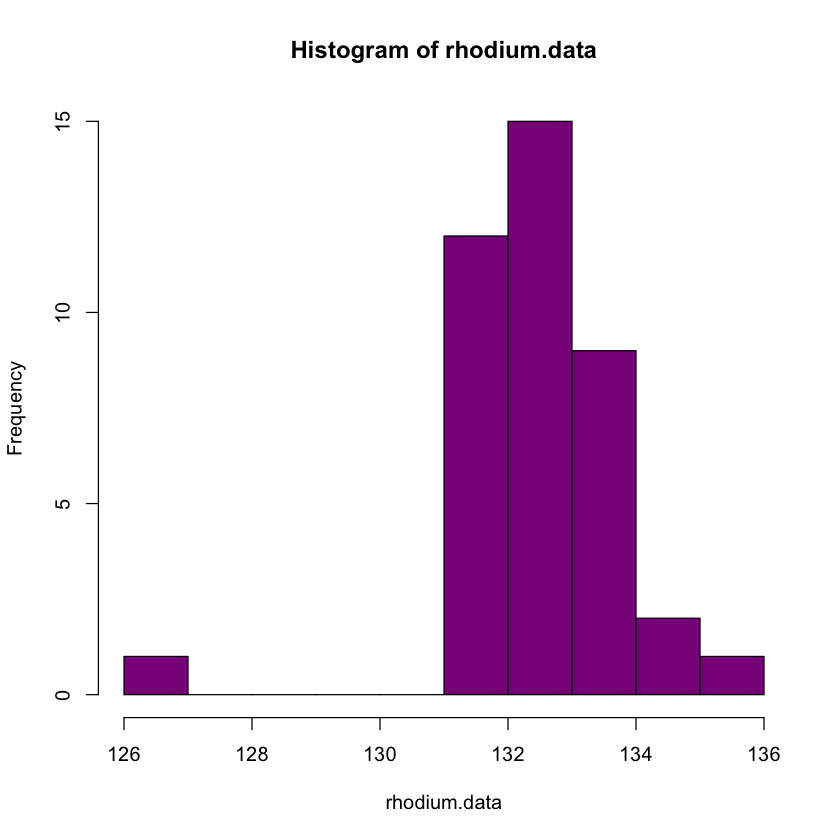

In [3]:
hist(rhodium.data, col="darkmagenta")

b) Plot the eCDFs with 95% confidence bands (you may use the ecdf.ksC() function in the R sfsmisc library)


In [4]:
if (!requireNamespace("sfsmisc", quietly = TRUE))
    install.packages("sfsmisc")

Warning message:
“package ‘sfsmisc’ was built under R version 3.6.2”


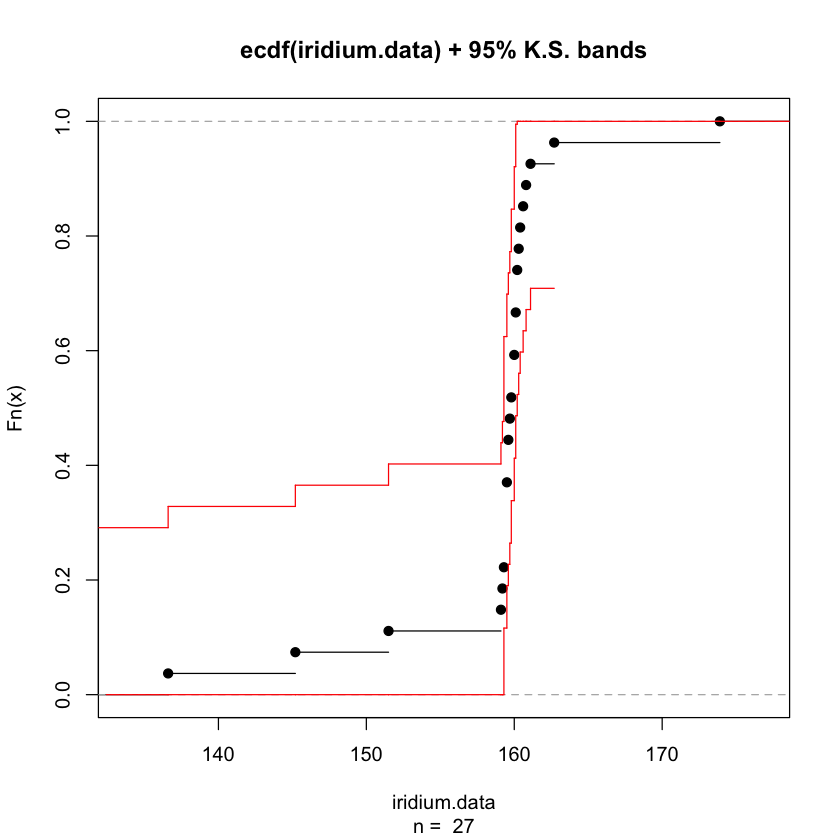

In [5]:
library(sfsmisc)
ecdf.ksCI(iridium.data)

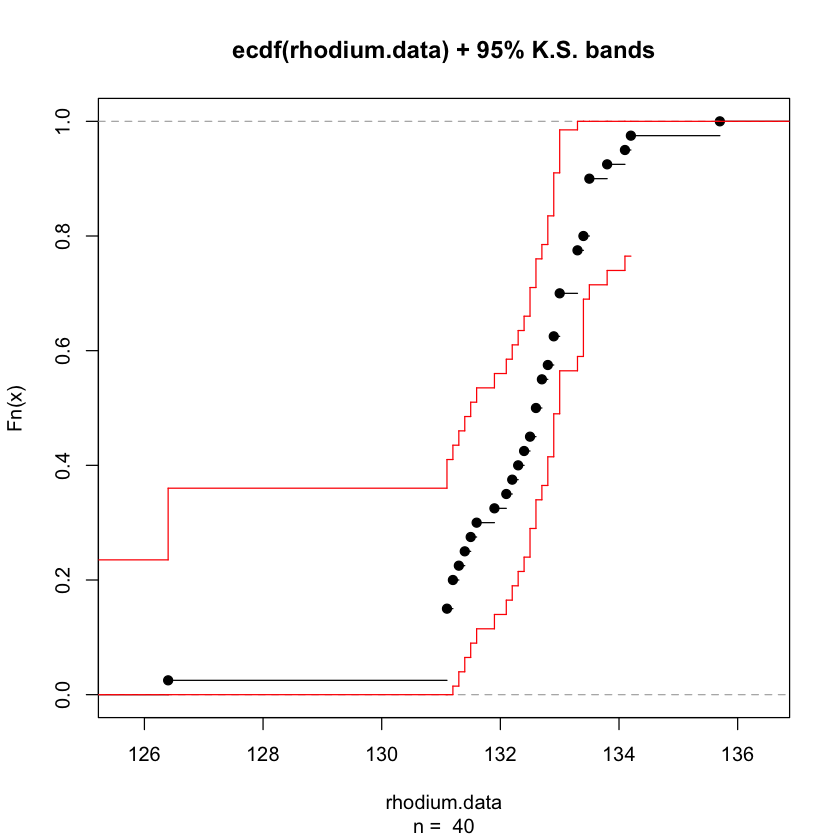

In [6]:
ecdf.ksCI(rhodium.data)

(c) Plot the kernel density estimate.

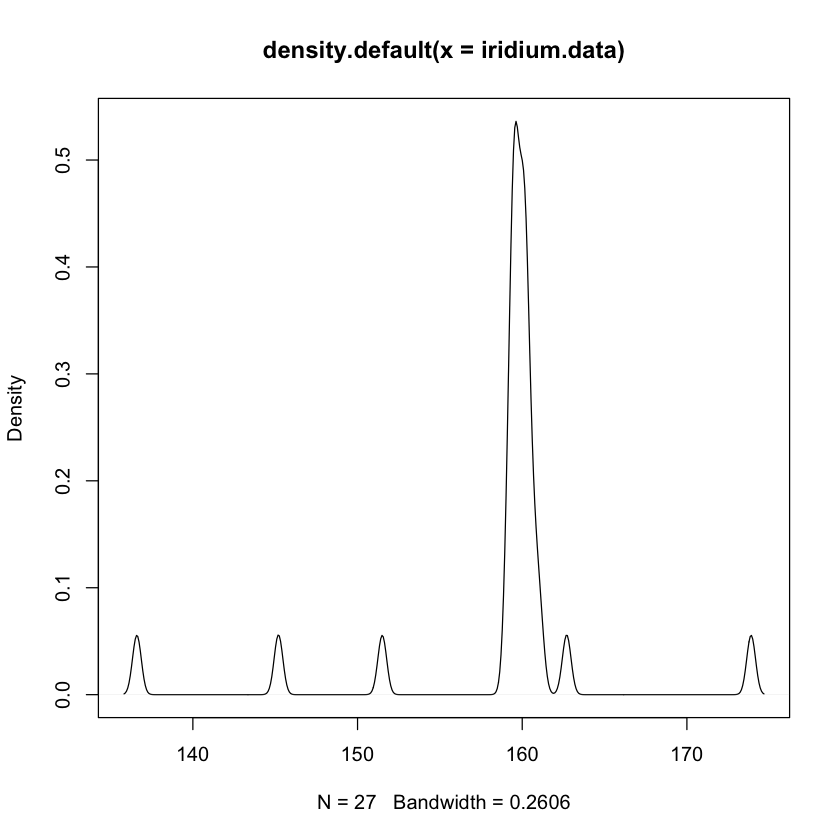

In [7]:
plot(density.default(x = iridium.data))

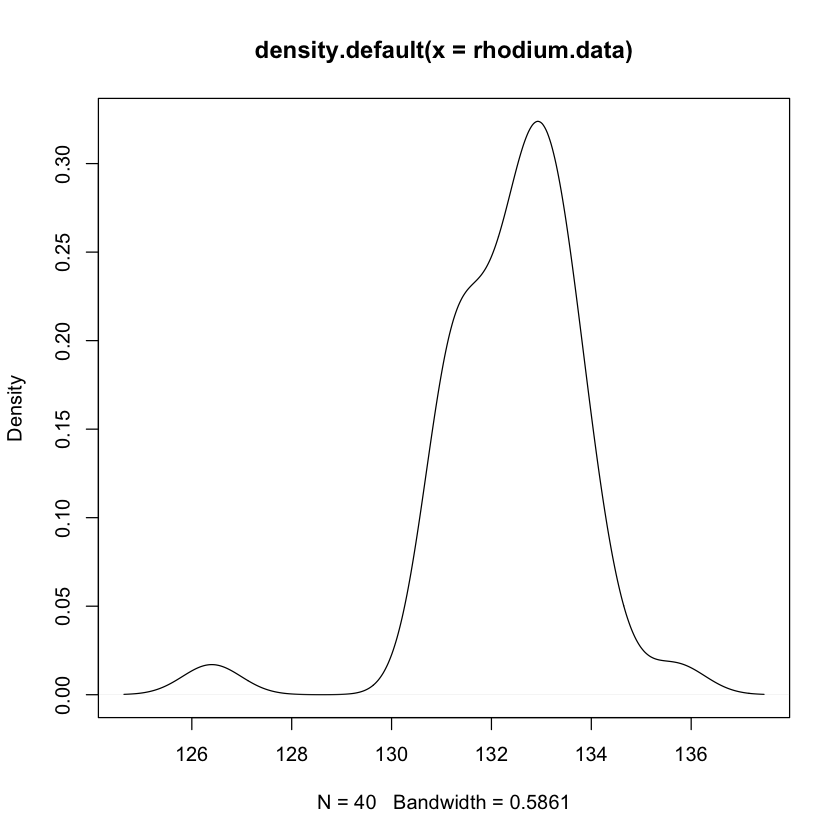

In [8]:
plot(density.default(x = rhodium.data))

d) Plot the observations in the order of the experiment.

e) Does that statistical model of iid measurement errors seem reasonable? Explain.

I would say yes for the second data set since it has enough samples.

f) Find the mean, 10% and 20% trimmed means, and median and compare them.

In [9]:
mean(iridium.data, trim=0.1)

[1] 159.5478

In [10]:
median(iridium.data, trim=0.1)

[1] 159.8

In [11]:
mean(iridium.data, trim=0.2)

[1] 159.8412

In [12]:
median(iridium.data, trim=0.2)

[1] 159.8

In [13]:
mean(rhodium.data, trim=0.1)

[1] 132.4781

In [14]:
median(rhodium.data, trim=0.1)

[1] 132.65

In [15]:
mean(rhodium.data, trim=0.2)

[1] 132.5292

In [16]:
median(rhodium.data, trim=0.2)

[1] 132.65

Ans: The 20% trimmed means are closer to the median than the 10%. The median is unchanged when trimming. 

g) Find the standard error of the sample mean and a corresponding 90% confidence interval. Overlay this CI on a density plot.

In [17]:
se <- function(x) sd(x)/sqrt(length(x))

In [18]:
# calculating SE
se1 <- se(iridium.data)
print(se1)

[1] 1.197917


In [19]:
se2 <- se(rhodium.data)
print(se2)

[1] 0.2273369


In [20]:
# 90% confidence interval for iridium data
lower_bound1 <- mean(iridium.data) - (1.645*(se1))
print(lower_bound1)
upper_bound1 <- mean(iridium.data) + (1.645*(se1))
print(upper_bound1)

[1] 156.8442
[1] 160.7854


In [21]:
# 90% confidence interval for rhodium.data

lower_bound2 <- mean(rhodium.data) - (1.645*(se1))
print(lower_bound2)
upper_bound2 <- mean(rhodium.data) + (1.645*(se1))
print(upper_bound2)

[1] 130.4494
[1] 134.3906


plots with 90% CI below.

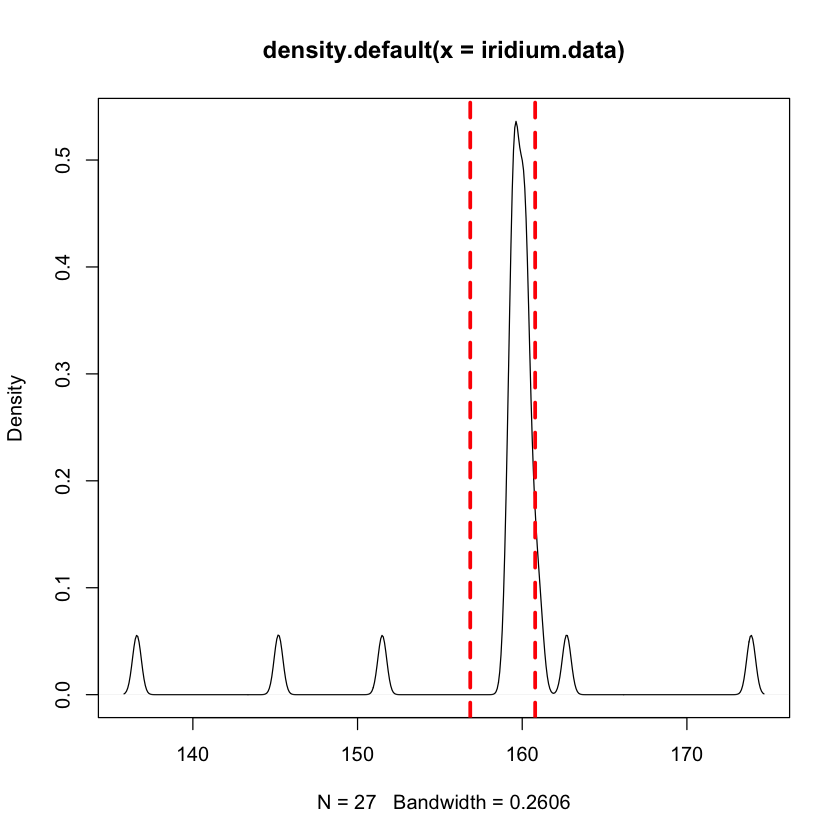

In [22]:
plot(density.default(x = iridium.data))
abline(v=lower_bound1, col="red", lwd=3, lty=2)
abline(v=upper_bound1, col="red", lwd=3, lty=2)


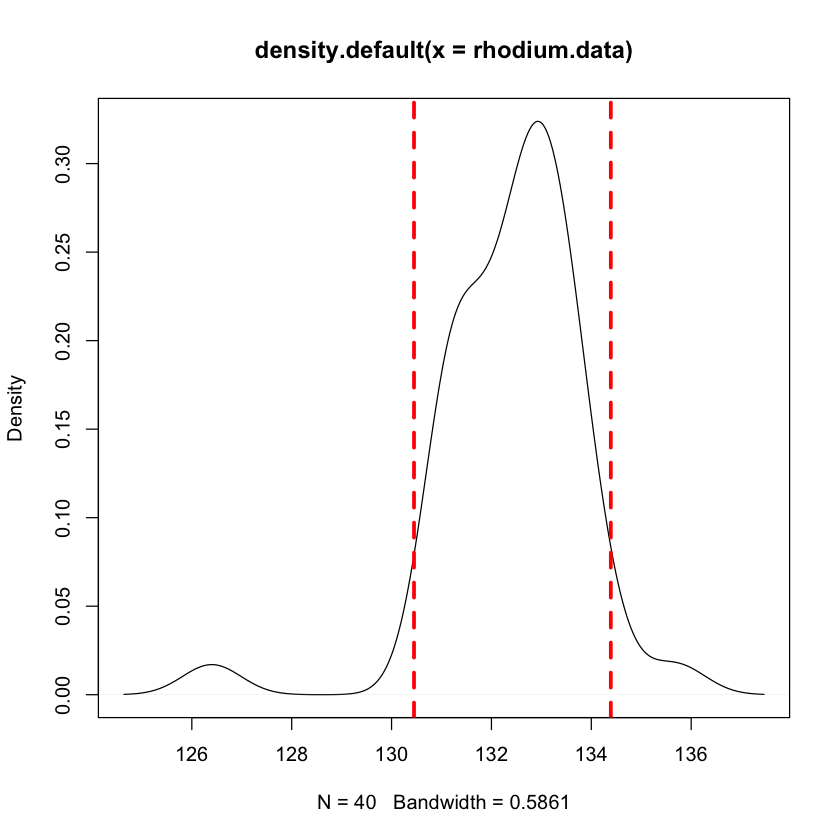

In [23]:
plot(density.default(x = rhodium.data))
abline(v=lower_bound2, col="red", lwd=3, lty=2)
abline(v=upper_bound2, col="red", lwd=3, lty=2)


(h) Use the bootstrap to approximate the sampling distribution of the 10% and 20% trimmed means and median. Plot the kernel density estimates of these bootstrap distributions in a single plot. Compute the standard errors and compare.


In [24]:
# For iridium.data (.2 trim, mean) 
 B = 10000
 n= length(iridium.data)
 bootstrap.data = matrix(sample(iridium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.means1 = apply(bootstrap.data, 1, function(x) {
 mean(x, trim=0.2)
})

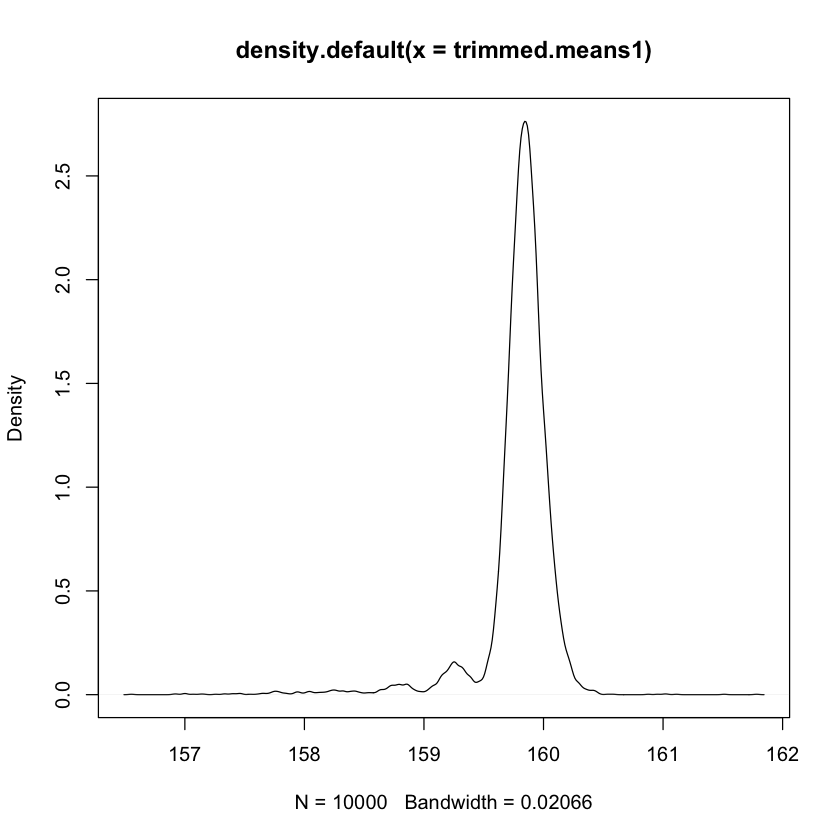

In [25]:
plot(density.default(x = trimmed.means1))

In [26]:
se(trimmed.means1)


[1] 0.003095303

In [27]:
# For iridium.data (.1 trim, mean) 
 B = 10000
 n= length(iridium.data)
 bootstrap.data = matrix(sample(iridium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.means2 = apply(bootstrap.data, 1, function(x) {
 mean(x, trim=0.1)
})

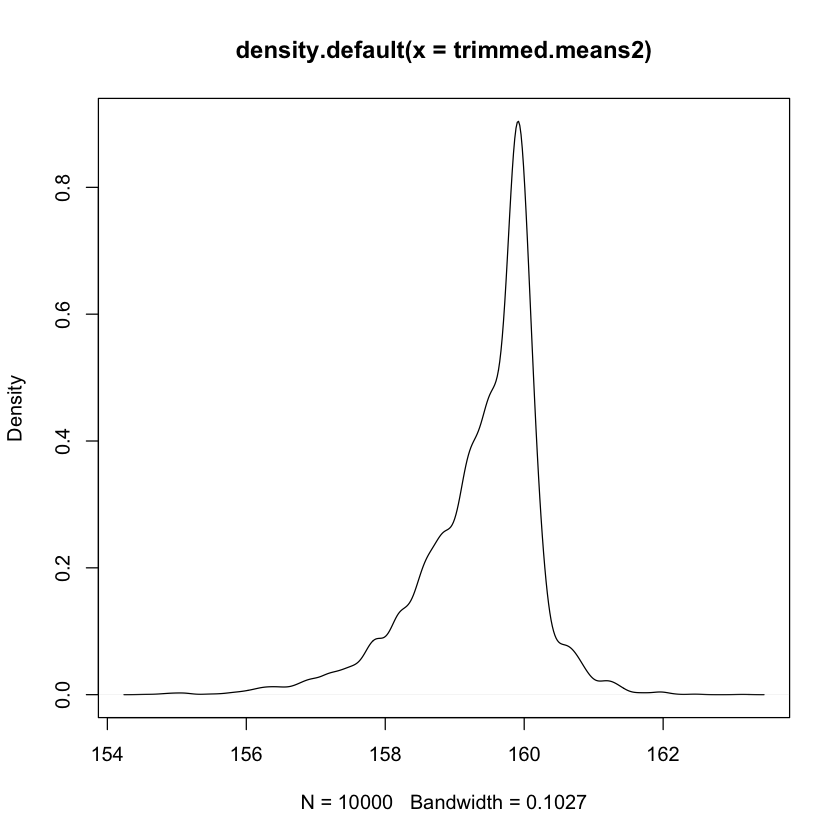

In [28]:
plot(density.default(x = trimmed.means2))

In [29]:
se(trimmed.means2)


[1] 0.008491918

In [30]:
# For iridium.data (.2 trim, median) 
 B = 10000
 n= length(iridium.data)
 bootstrap.data = matrix(sample(iridium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.medians1 = apply(bootstrap.data, 1, function(x) {
 median(x, trim=0.2)
})

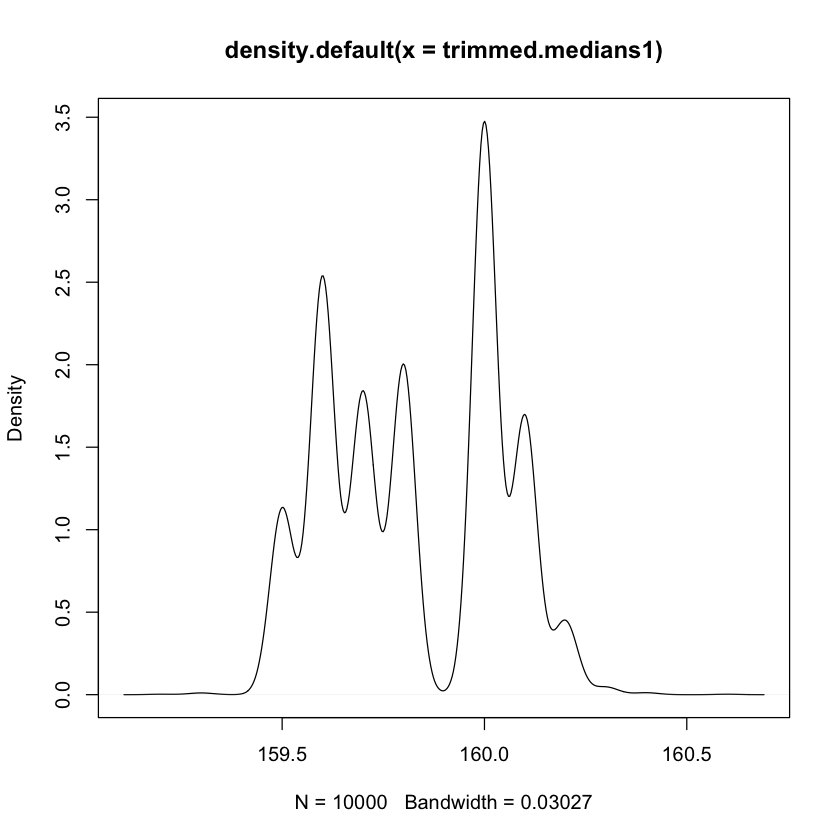

In [31]:
plot(density.default(x = trimmed.medians1))

In [32]:
se(trimmed.medians1)


[1] 0.002122383

In [33]:
# For iridium.data (.1 trim, median) 
 B = 10000
 n= length(iridium.data)
 bootstrap.data = matrix(sample(iridium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.medians2 = apply(bootstrap.data, 1, function(x) {
 median(x, trim=0.1)
})

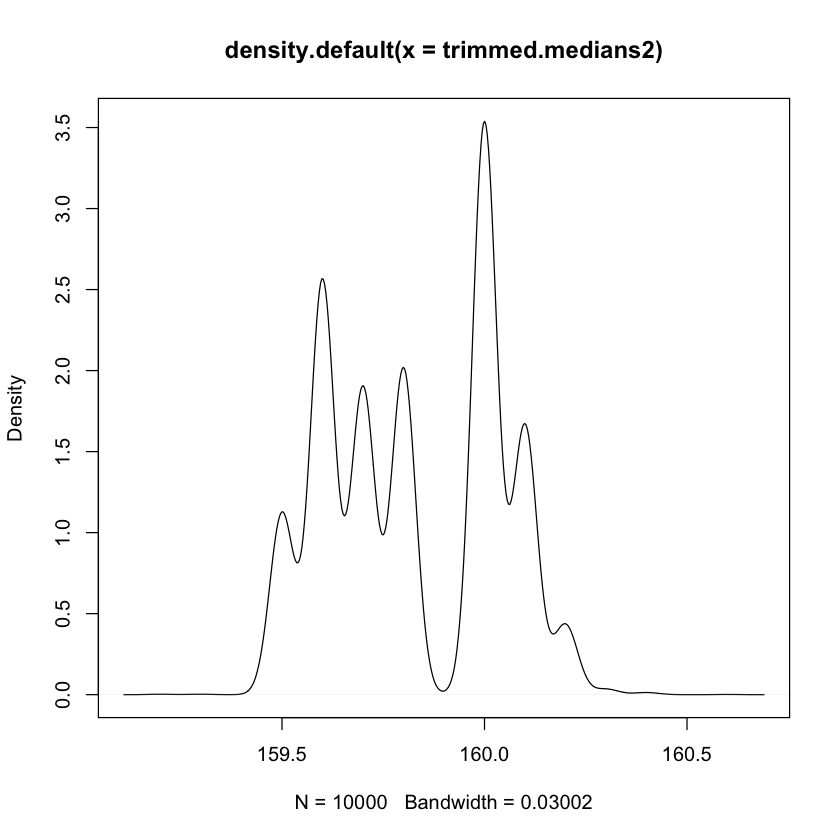

In [34]:
plot(density.default(x = trimmed.medians2))

In [35]:
se(trimmed.medians2)


[1] 0.002104692

now we will repeate for our other data set 'rhodium.data'

In [36]:
# For rhodium.data (.2 trim, mean) 
 B = 10000
 n= length(rhodium.data)
 bootstrap.data = matrix(sample(rhodium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.means3 = apply(bootstrap.data, 1, function(x) {
 mean(x, trim=0.2)
})

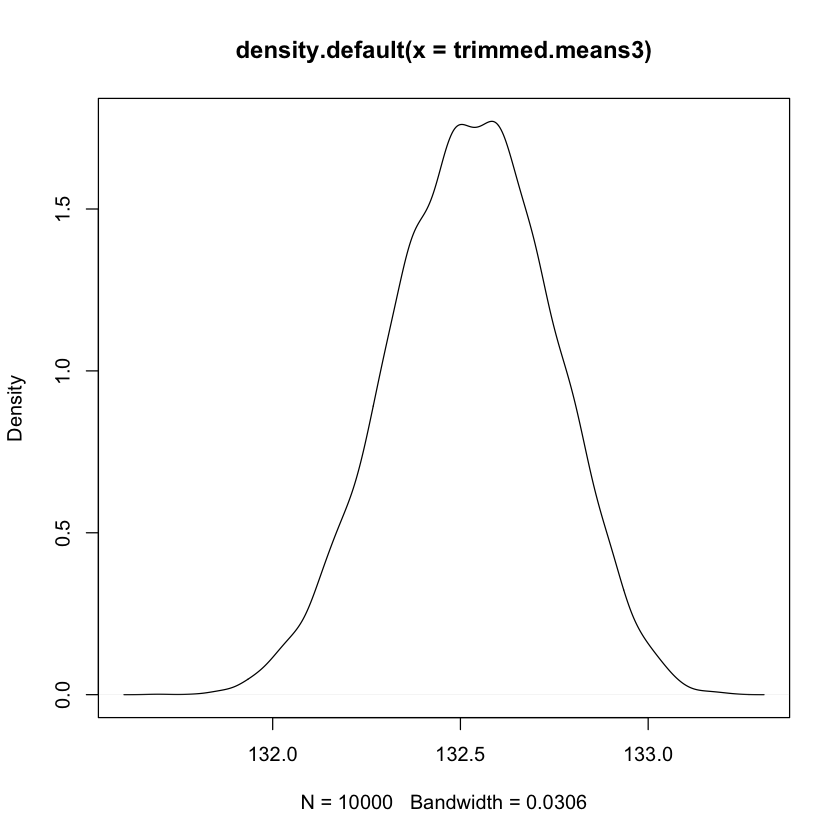

In [37]:
plot(density.default(x = trimmed.means3))

In [38]:
se(trimmed.means3)


[1] 0.002145418

In [39]:
# For rhodium.data (.1 trim, mean) 
 B = 10000
 n= length(rhodium.data)
 bootstrap.data = matrix(sample(rhodium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.means4 = apply(bootstrap.data, 1, function(x) {
 mean(x, trim=0.1)
})

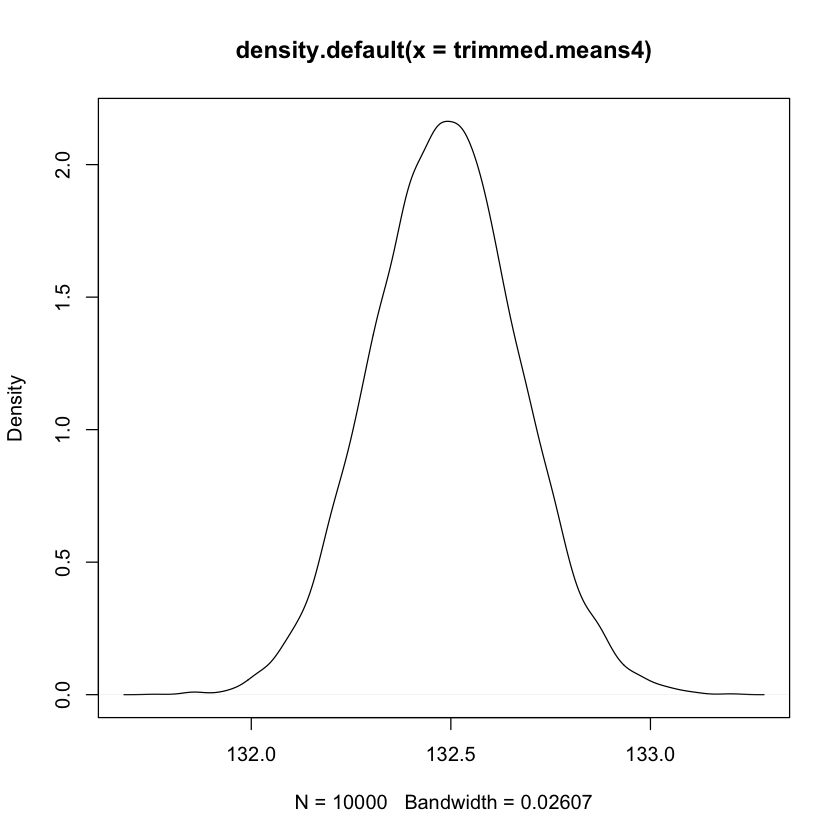

In [40]:
plot(density.default(x = trimmed.means4))

In [41]:
se(trimmed.means4)


[1] 0.001827659

In [42]:
# For rhodium.data (.2 trim, median) 
 B = 10000
 n= length(rhodium.data)
 bootstrap.data = matrix(sample(rhodium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.medians3 = apply(bootstrap.data, 1, function(x) {
 median(x, trim=0.2)
})

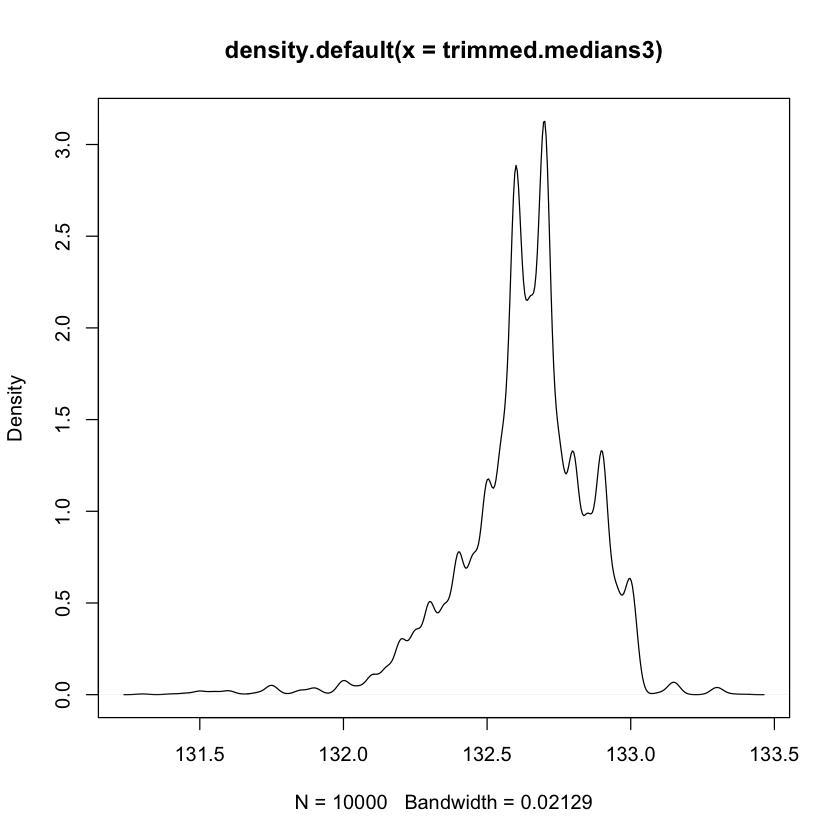

In [43]:
plot(density.default(x = trimmed.medians3))

In [44]:
se(trimmed.medians3)


[1] 0.002199653

In [45]:
# For rhodium.data (.1 trim, median) 
 B = 10000
 n= length(rhodium.data)
 bootstrap.data = matrix(sample(rhodium.data, B*n, replace=T),
 nrow=B, ncol=n)
 trimmed.medians4 = apply(bootstrap.data, 1, function(x) {
 median(x, trim=0.1)
})

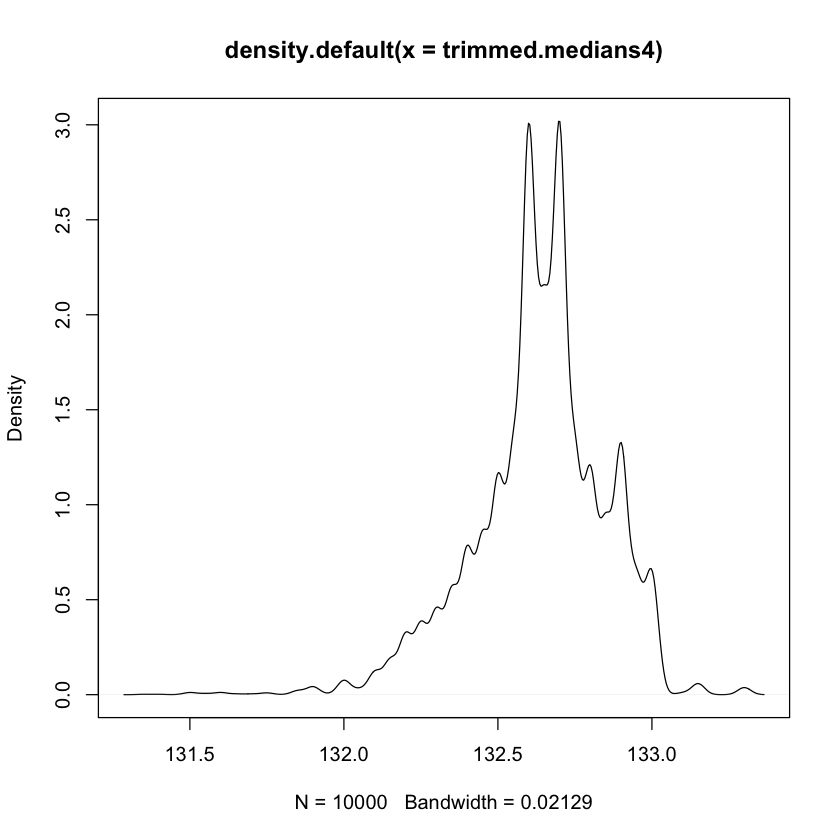

In [46]:
plot(density.default(x = trimmed.medians4))

In [47]:
se(trimmed.medians4)


[1] 0.002121837

Again we notice the SE is pretty robust to median trim. As Mean trim % increases we see the values approach its distribution median.

(i) Find approximate 90% CIs based on the trimmed means and median and compare to the intervals for the mean.


In [48]:
# 90% for iridium.data (.20% trim)
trimmed.means1 = sort(trimmed.means1)

(quant.05 = trimmed.means1[B*.05]) #lower bound

(quant.95 = trimmed.means1[B*.95]) #upper bound




[1] 159.2706

[1] 160.1

In [49]:
# 90% for iridium.data (.10% trim)
trimmed.means2 = sort(trimmed.means2)

(quant.05 = trimmed.means2[B*.05]) #lower bound

(quant.95 = trimmed.means2[B*.95]) #upper bound



[1] 157.7783

[1] 160.3783

In [50]:
# 90% for iridium.data (.20% trim) (median)
trimmed.medians1 = sort(trimmed.medians1)

(quant.05 = trimmed.medians1[B*.05]) #lower bound

(quant.95 = trimmed.medians1[B*.95]) #upper bound


[1] 159.5

[1] 160.1

In [51]:
# 90% for iridium.data (.10% trim) (median)
trimmed.medians2 = sort(trimmed.medians2)

(quant.05 = trimmed.medians2[B*.05]) #lower bound

(quant.95 = trimmed.medians2[B*.95]) #upper bound


[1] 159.5

[1] 160.1

 Now for other dataset

In [52]:
# 90% for rhodium.data (.20% trim)
trimmed.means3 = sort(trimmed.means3)

(quant.05 = trimmed.means3[B*.05]) #lower bound

(quant.95 = trimmed.means3[B*.95]) #upper bound




[1] 132.1667

[1] 132.875

In [53]:
# 90% for rhodium.data (.10% trim)
trimmed.means4 = sort(trimmed.means4)

(quant.05 = trimmed.means4[B*.05]) #lower bound

(quant.95 = trimmed.means4[B*.95]) #upper bound



[1] 132.1906

[1] 132.7875

In [54]:
# 90% for rhodium.data (.20% trim) (median)
trimmed.medians3 = sort(trimmed.medians3)

(quant.05 = trimmed.medians3[B*.05]) #lower bound

(quant.95 = trimmed.medians3[B*.95]) #upper bound


[1] 132.25

[1] 132.95

In [55]:
# 90% for rhodium.data (.10% trim) (median)
trimmed.medians4 = sort(trimmed.medians4)

(quant.05 = trimmed.medians4[B*.05]) #lower bound

(quant.95 = trimmed.medians4[B*.95]) #upper bound


[1] 132.25

[1] 132.95

20% mean trim for first data set has a tighter interval than 10%, however the inverse is true for the second dataset. Both median CI remain constant for both 10% and 20%

# 2. (Based on Rice 11.21) A study was done to compare the performances of engine bearings made of different compounds. Ten bearings of each type were tested. The following table gives the times until failure (in millions of cycles):


(a) Use normal theory to test the hypothesis that there is no difference between the type types of bearings (you can use pt() but not t.test()).

(b) Test the same hypothesis using a nonparametric method (use just pnorm() to evaluate using the normal approximation for the rank sum and compare that result to the exact distribution using wilcox.test()).

(c) Which of the methods, parametric or nonparametric, do you think is better in this case?

(d) Estimate π, the probability that a type I bearing will outlast a type II bearning?

(e) Use the bootstrap to estimate the sampling distribution of πˆ and its SE (visualize the bootstrap distribution using both a kernel density plot probability plot relative to normal distribution and comment on the bootstrap distribution.)

(f) Use the bootstrap to find an approximate 90% CI for π (compute using both the basic and percentile bootstrap CI methods).

In [56]:
type.I.failure.times = c(3.03, 5.53, 5.6, 9.3, 9.92, 12.51, 12.95, 15.21, 16.04, 16.84)
type.II.failure.times = c(3.19, 4.26, 4.47, 4.53, 4.67, 4.69, 12.78, 6.79, 9.37, 12.75)


In [57]:
#a)

meanI <- mean(type.I.failure.times)
meanII <- mean(type.II.failure.times)

se <- function(x) (sd(x)*sd(x))/length(x)

se1 <- se(type.I.failure.times)
se2 <- se(type.II.failure.times)

bottom <- sqrt(se1+se2)
top <- meanI - meanII

t <- top / bottom
print(t)

[1] 2.072309


In [58]:
1 - pt(t, 9) #9 DF


[1] 0.0340544

answer to a): since our p-value .03405 is less than our alpha level of .05, we reject our null hypothesis and have reason to believe there is a difference of means between our two types of bearings.

In [59]:
#b)

1 - pnorm(t)

[1] 0.01911832

c) Which of the methods, parametric or nonparametric, do you think is better in this case?

Since our sample is very, very small (n<30), we should use a t-Distribution rather than a z-distribution.


In [60]:
#d)

sumI <- sum(type.I.failure.times)
finalI <- sumI - (10*(11/2))
print("Number of paired comparisons below:")
print(finalI) # number of paired comparisons 

print("Number of total paired comparisons below:")
print(10*10) 

print("Thus, this means our best estimate of pi is:")
print(finalI / (10*10))

[1] "Number of paired comparisons below:"
[1] 51.93
[1] "Number of total paired comparisons below:"
[1] 100
[1] "Thus, this means our best estimate of pi is:"
[1] 0.5193


In [61]:
#e
 B = 10000
 n= length(type.I.failure.times)
 bootstrap.data1 = matrix(sample(type.I.failure.times, B*n, replace=T), nrow=B, ncol=n)
 bootstrap.data2 = matrix(sample(type.II.failure.times, B*n, replace=T), nrow=B, ncol=n)


trimmed.means1 = apply(bootstrap.data1, 1, function(x) { mean(x, trim=0.2) })
trimmed.means2 = apply(bootstrap.data2, 1, function(x) { mean(x, trim=0.2) })

#plot(density.default(x = trimmed.means1))
#plot(density.default(x = trimmed.means2))


im not sure if i did it right?


[1] 10.90587
[1] 10.90706


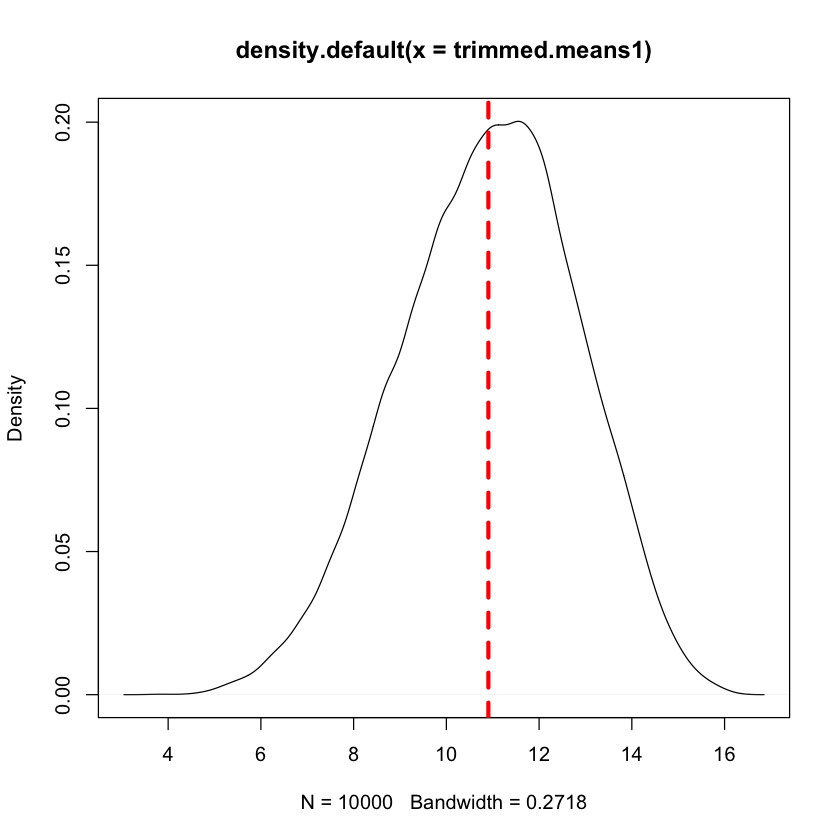

In [62]:
#f (for trimmed.means1) standard way
se1 <- se(trimmed.means1)
lower_bound1 <- mean(trimmed.means1) - (1.645*(se1))
print(lower_bound1)
upper_bound1 <- mean(trimmed.means1) + (1.645*(se1))
print(upper_bound1)

plot(density.default(x = trimmed.means1))
abline(v=lower_bound1, col="red", lwd=3, lty=2)
abline(v=upper_bound1, col="red", lwd=3, lty=2)

[1] 6.078807
[1] 6.079427


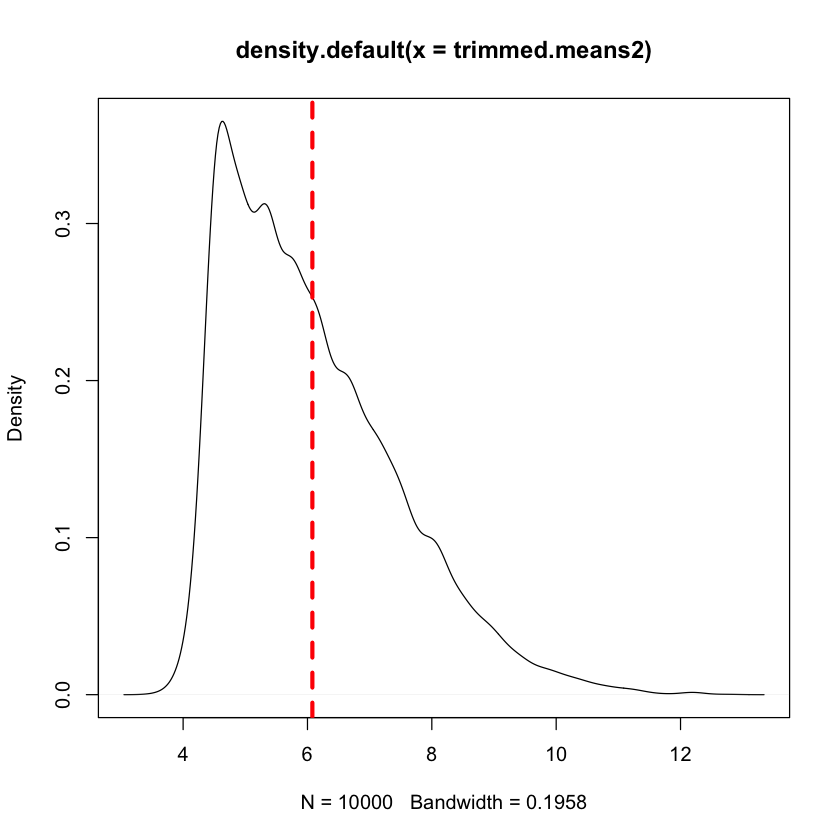

In [63]:
#f (for trimmed.means2) standard way
se1 <- se(trimmed.means2)
lower_bound1 <- mean(trimmed.means2) - (1.645*(se1))
print(lower_bound1)
upper_bound1 <- mean(trimmed.means2) + (1.645*(se1))
print(upper_bound1)

plot(density.default(x = trimmed.means2))
abline(v=lower_bound1, col="red", lwd=3, lty=2)
abline(v=upper_bound1, col="red", lwd=3, lty=2)

[1] 7.636667

[1] 13.91667

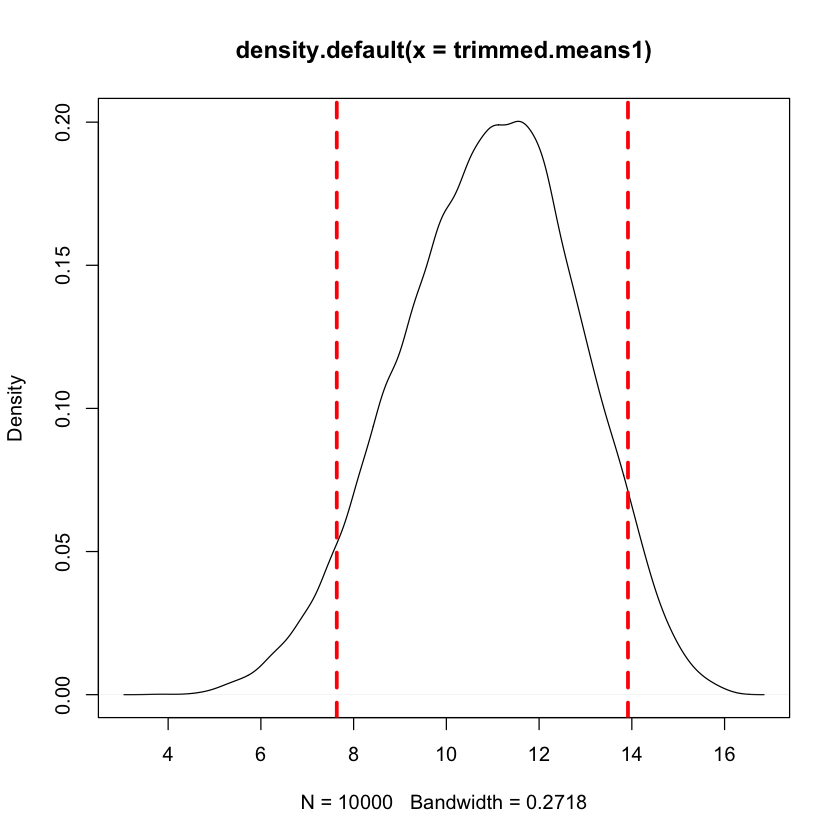

In [64]:
#f percentile way (trimmed.means1)
trimmed.means1 = sort(trimmed.means1)
(quant.05 = trimmed.means1[B*.05])
(quant.95 = trimmed.means1[B*.95])

plot(density.default(x = trimmed.means1))
abline(v=quant.05, col="red", lwd=3, lty=2)
abline(v=quant.95, col="red", lwd=3, lty=2)

[1] 4.48

[1] 8.713333

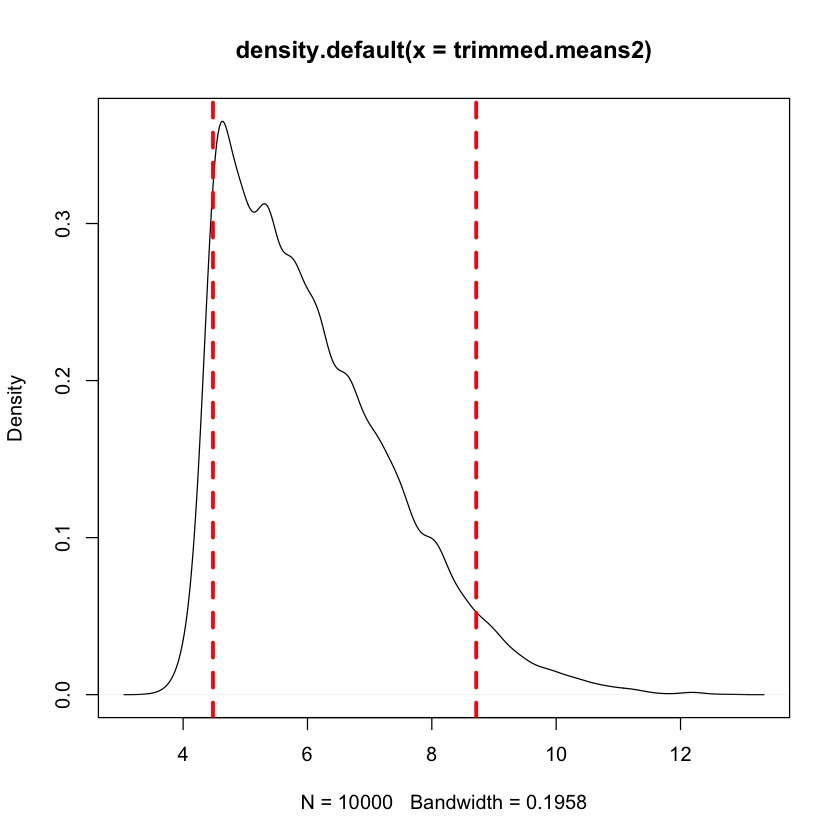

In [65]:
#f percentile way (trimmed.means2)
trimmed.means2 = sort(trimmed.means2)
(quant.05 = trimmed.means2[B*.05])
(quant.95 = trimmed.means2[B*.95])

plot(density.default(x = trimmed.means2))
abline(v=quant.05, col="red", lwd=3, lty=2)
abline(v=quant.95, col="red", lwd=3, lty=2)

# 3)  Referring to Example A in Section 11.2.1:

(a) If the smallest observation for method B is made arbitrarily small, will the t test still reject?

(b) If the largest observation for method B is made arbitrarily large, will the t test still reject?

(c) Answer the same questions for the Mann-Whitney test.

a) No, if the smallest observation for method B is made arbitrarily small, the t-test will not reject. 

b) No, if the smallest observation for method B is made arbitrarily small, the t-test will not reject. 

c) Yes, it will still reject given the change in values. 


# 4. (Based on Rice 11.36) Lin, Sutton and Qurashi compared microbiological and hydroxylamine methods for the analysis of ampicillin dosages. In one series of experiments, pairs of tablets were analyzed by the two methods. The data in the following table give the percentages of the claimed amount of ampicillin found by the two methods in several pairs of tablets.

(a) What are X_bar − Y_bar and s{x_bar - y_bar}?

(b) If the pairing had been erroneously ignored and it had been assumed that the two samples were independent, what would have been the estimate of the SD of X_bar − Y_bar?

(c) Analyze the data to determine if there is a systematic difference between the two meth- ods.



In [66]:
data = data.frame(micro=c(97.2, 105.8, 99.5, 100, 93.8, 79.2, 72, 72, 69.5, 20.5, 95.2, 90.8, 96.2, 96.2, 91),
                  hydro=c(97.2, 97.8, 96.2, 101.8, 88, 74, 75, 67.5, 65.8, 21.2, 94.8, 95.8, 98, 99, 100.2))
data

micro,hydro
<dbl>,<dbl>
97.2,97.2
105.8,97.8
99.5,96.2
100.0,101.8
93.8,88.0
79.2,74.0
72.0,75.0
72.0,67.5
69.5,65.8


In [67]:
#a)

data$Diff <- data$micro - data$hydro
data

micro,hydro,Diff
<dbl>,<dbl>,<dbl>
97.2,97.2,0.0
105.8,97.8,8.0
99.5,96.2,3.3
100.0,101.8,-1.8
93.8,88.0,5.8
79.2,74.0,5.2
72.0,75.0,-3.0
72.0,67.5,4.5
69.5,65.8,3.7


In [68]:
sumDiff <- sum(data$Diff) #sum difference (D)
sumDiff

[1] 6.6

In [69]:
# x_bar - y_bar calculation
print(sumDiff / 15) #15 is length

[1] 0.44


In [70]:
# Standard dev of the differences calculation
data$SdDiff <- (data$Diff - mean(data$Diff))^2
data

micro,hydro,Diff,SdDiff
<dbl>,<dbl>,<dbl>,<dbl>
97.2,97.2,0.0,0.1936
105.8,97.8,8.0,57.1536
99.5,96.2,3.3,8.1796
100.0,101.8,-1.8,5.0176
93.8,88.0,5.8,28.7296
79.2,74.0,5.2,22.6576
72.0,75.0,-3.0,11.8336
72.0,67.5,4.5,16.4836
69.5,65.8,3.7,10.6276


In [71]:
# Standard dev of the differences calculation
sumSdDiff <- sum(data$SdDiff)

equation <- sqrt(sumSdDiff / (15-1))

equation

[1] 4.630767

b) If the pairing had been erroneously ignored and it had been assumed that the two samples were independent, what would have been the estimate of the SD of X_bar − Y_bar?

If the samples were independent covariance would be 0. Calculation below:

\begin{equation} \frac{\sqrt{21.196^2+21.545^2}}{15} = 2.015 \end{equation}


In [72]:
# c)

# Ho: there is no difference in their means
# Ha: There is a difference in their means (two-tailed)
wilcox.test(data$micro, data$hydro, alternative = "two.sided")


Warning message in wilcox.test.default(data$micro, data$hydro, alternative = "two.sided"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$micro and data$hydro
W = 106.5, p-value = 0.8194
alternative hypothesis: true location shift is not equal to 0


Whatever method is used, the difference
in the means is not statistically different from zero since our p-value is not less than our alpha level of .05  (fail to reject our null hypothesis).